In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [22]:
boston = load_boston() #dict type
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
x_data = pd.DataFrame(boston.data, columns = boston.feature_names)
x_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y_data = boston.target

- fitting을 시킬 때 반드시 2d array로 바꿔줘야 됨.

In [11]:
y_data.shape

(506,)

In [14]:
y_data = y_data.reshape(-1,1) #-1은 unknown. row 수 맞춰서 column수 자동으로 정해줌
y_data.shape

(506, 1)

# 1. simple linear regression

### - traindata,  testdata

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.3)

In [16]:
#'AGE' column만 먼저 fitting 할 것
x1_test = x_test['AGE']
x1_train = x_train['AGE']

In [17]:
#2D로 바꿔줌
x1_test = np.array(x1_test).reshape(-1,1)
x1_train = np.array(x1_train).reshape(-1,1)

### - fitting

sklearn에 있는 LinearRegression 클래스를 이용

In [18]:
model = LinearRegression()

In [19]:
model.fit(x1_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
coef = model.coef_
intercept = model.intercept_
print(intercept, coef)

[30.88890135] [[-0.12451379]]


### - predict

In [25]:
y1_predict = model.predict(x1_test)

### - residual plot

In [26]:
resid = y_test - y1_predict #y-yhat ##(실제값-예측값) - SSE 오차같은느낌?

#### 1. 잔차 vs 순서 그림 : 독립성 가정 확인

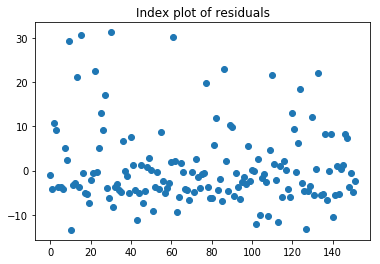

In [27]:
plt.scatter(pd.DataFrame(resid).index,resid) #index 사용 위해 dataframe으로
plt.title("Index plot of residuals")
plt.show()

#### 2. 잔차 vs 적합치 : 등분산성 가정 확인

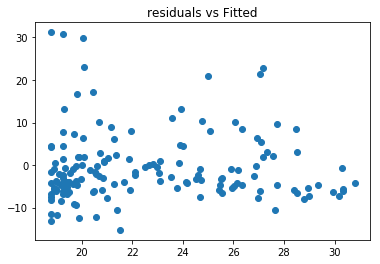

In [17]:
plt.scatter(y1_predict, resid)
plt.title("residuals vs Fitted")
plt.show()

#### 3. 잔차의 Q-Q plot : 정규성 가정 확인

In [28]:
import scipy.stats as stats

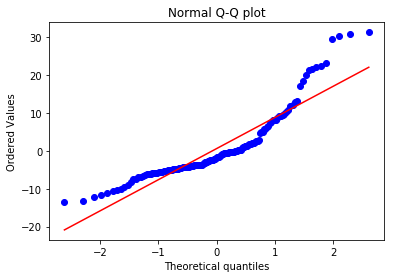

In [29]:
stats.probplot(resid.reshape(152,), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### - plot

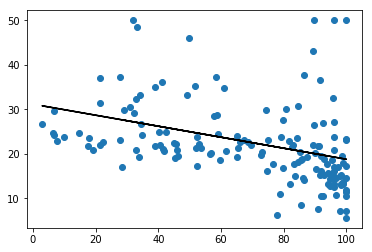

In [20]:
plt.scatter(x1_test, y_test)
plt.plot(x1_test,y1_predict , color='black')
plt.show()

In [21]:
mse = mean_squared_error(y_test, y1_predict)
r2 = r2_score(y_test, y1_predict)
print('mean_squared_error:', mse)
print('r2_score:', r2)

mean_squared_error: 68.2924540914316
r2_score: 0.1455699041279409


# 2. Multiple linear regression

### - fitting

In [22]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
intercept = model.intercept_
coef = model.coef_
print(intercept, coef)

[24.17609529] [[-6.64575493e-02  4.06611860e-02  1.16971645e-02  3.29372305e+00
  -1.61938870e+01  4.89399258e+00 -6.23092165e-03 -1.40547608e+00
   2.65384220e-01 -9.98785675e-03 -8.02959119e-01  1.17500709e-02
  -4.72623832e-01]]


### - predict

In [24]:
y_predict = model.predict(x_test)

In [25]:
mse2 = mean_squared_error(y_test, y_predict)
r22 = r2_score(y_test, y_predict)
print('mse : ' , mse2)
print('r-squared' , r22) #왜 이게 multiple??

mse :  26.99579138973603
r-squared 0.6622464819554893


# 3. dummy variable

In [26]:
apt = pd.read_csv('./apt.txt', sep='\t')
apt.head()

,y,company,subway,year,size,volume
0,31000,GN,0,1984,32,678
1,26000,HD,1,1984,31,416
2,47500,HD,1,1984,46,416
3,59000,HD,1,1984,58,416
4,31000,HD,1,1985,32,558


In [27]:
pd.get_dummies(apt['company']).head()

,AJ,CG,CPC,CW,DB,DH,DI,DL,DS,DW,...,JY,Lu,SDA,SDY,SH,SI,SK,SS,SY,WS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
f = lambda x : int(x=='HD' or x=='SS') #lambda : 익명함수
apt['big'] = apt['company'].apply(f)

In [29]:
apt.head()

,y,company,subway,year,size,volume,big
0,31000,GN,0,1984,32,678,0
1,26000,HD,1,1984,31,416,1
2,47500,HD,1,1984,46,416,1
3,59000,HD,1,1984,58,416,1
4,31000,HD,1,1985,32,558,1


In [30]:
model = LinearRegression()
model.fit(apt.iloc[:,2:],apt['y'])    #except company

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
model.intercept_, model.coef_

(-257361.57091177494,
 array([1096.62833759,  118.07683107, 1525.09860144,    2.11592043,
        1390.38146154]))